In [0]:
# key word: CNN, Keras, CIFAR-10, Image classification

# Dataset: The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 
# classes, with 6000 images per class. There are 50000 training images and 
# 10000 test images. The classes are mutually exclusive and there is no overlap 
# between them.

Dataset link: [CIFAR-10 Dataset](https://www.cs.toronto.edu/%7Ekriz/cifar.html)

In [0]:
# pre-loading
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
# data-loading
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values, the pixel values are between 0-255 (8-bits color)
train_images = train_images / 255.0
test_images = test_images / 255.0

170500096/170498071 [==============================] - 11s 0us/step


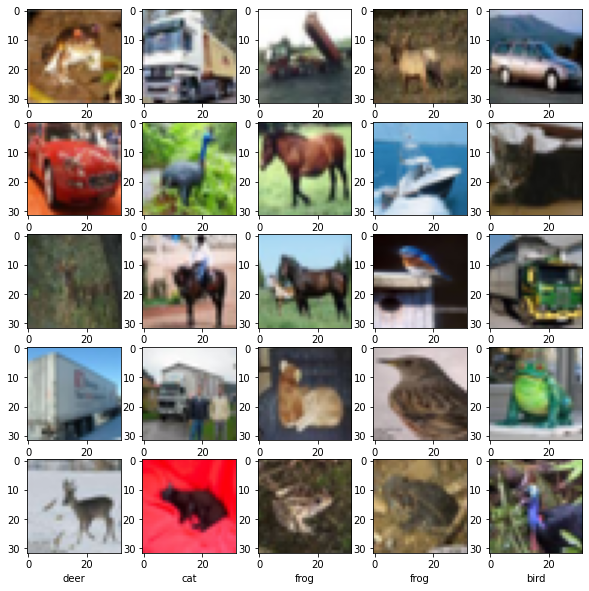

In [4]:
# plot the data
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [5]:
# model construct 
# CNN 忽略batch size把 (height, width, channels)格式的数据作为输入
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0

In [9]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data = (test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.5831 - accuracy: 0.4124 - val_loss: 1.2849 - val_accuracy: 0.5308
Epoch 2/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.2178 - accuracy: 0.5579 - val_loss: 1.1419 - val_accuracy: 0.5907
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0583 - accuracy: 0.6236 - val_loss: 1.0604 - val_accuracy: 0.6270
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9529 - accuracy: 0.6625 - val_loss: 0.9430 - val_accuracy: 0.6681
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8794 - accuracy: 0.6885 - val_loss: 0.9178 - val_accuracy: 0.6843
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8117 - accuracy: 0.7137 - val_loss: 0.9160 - val_accuracy: 0.6864
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7653 - accuracy: 0.7318 - val_loss: 0.9596 -

CNN的训练时间的确是慢很多，也因此在2012年之前因为计算机性能的限制一直未能发展和应用。

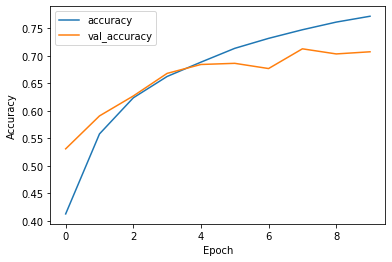

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()